**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [135]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [137]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [138]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data1 = train_data.astype('float')
test_data1 = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2721 - acc: 0.9157 - val_loss: 0.1933 - val_acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0947 - acc: 0.9710 - val_loss: 0.0924 - val_acc: 0.9706
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0590 - acc: 0.9816 - val_loss: 0.0723 - val_acc: 0.9777
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0414 - acc: 0.9867 - val_loss: 0.0683 - val_acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0298 - acc: 0.9906 - val_loss: 0.0746 - val_acc: 0.9787
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0696 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0694 - val_acc

In [145]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


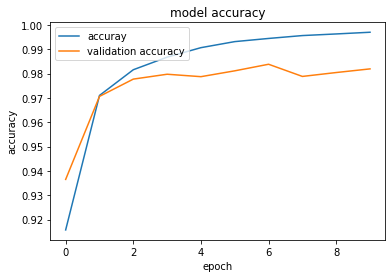

In [146]:
#import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy'], loc='upper left')
plt.show()

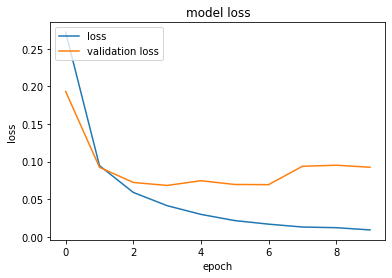

In [147]:
#import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

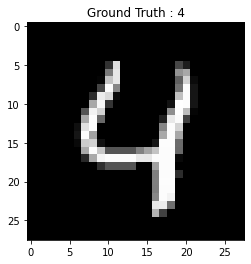

In [148]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [149]:
x=model.predict_classes(test_data[[4],:])
print(test_labels[x])

[4]


In [155]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3308 - acc: 0.8956 - val_loss: 0.1504 - val_acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1040 - acc: 0.9687 - val_loss: 0.1393 - val_acc: 0.9589
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0678 - acc: 0.9798 - val_loss: 0.0801 - val_acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0754 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0915 - val_acc: 0.9777
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.1182 - val_acc: 0.9688
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0230 - acc: 0.9932 - val_loss: 0.0793 - val_acc

In [153]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data1, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data1, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 14.0666 - acc: 0.1272 - val_loss: 13.0456 - val_acc: 0.1905
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 13.0109 - acc: 0.1926 - val_loss: 11.6452 - val_acc: 0.2774
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 11.7700 - acc: 0.2695 - val_loss: 11.5859 - val_acc: 0.2811
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 11.1825 - acc: 0.3059 - val_loss: 10.3932 - val_acc: 0.3550
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 10.0430 - acc: 0.3767 - val_loss: 10.3139 - val_acc: 0.3599
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 10.0641 - acc: 0.3754 - val_loss: 10.3017 - val_acc: 0.3607
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 9.9949 - acc: 0.3798 - val_loss: 10.0

In [154]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2745 - acc: 0.9154 - val_loss: 0.1391 - val_acc: 0.9577
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0933 - acc: 0.9712 - val_loss: 0.0848 - val_acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0695 - val_acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0394 - acc: 0.9871 - val_loss: 0.0914 - val_acc: 0.9739
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0774 - val_acc: 0.9779
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0216 - acc: 0.9927 - val_loss: 0.0721 - val_acc: 0.9801
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0163 - acc: 0.9947 - val_loss: 0.0919 - val_acc